In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Optimization functions

### Sthocastic Gradient Descent

In [2]:
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling

    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

### Gradient Descent

In [3]:
def GD(loss, grad_loss, D, theta0, alpha, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling

    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Compute the gradient of the loss
        gradient = grad_loss(theta, X, y)
        grad_norm_history[epoch] = np.linalg.norm(gradient, 2)

        # Update weights
        theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
    
    return theta_history, loss_history, grad_norm_history

### Normal Equations

In [4]:
def NE(K, D):
    x, y = D
    N = x.shape[0]
    PhiX = vandermonde(x, K)
    P = PhiX @ PhiX.T
    # solve X XT theta = X Y
    L = np.linalg.cholesky(P)
    # solve L z = X Y
    z = np.linalg.solve(L, PhiX @ y)
    # solve LT theta = z
    theta = np.linalg.solve(L.T, z)
    return theta

def vandermonde(x, K):
    v = np.ones((K, N))
    for i in range(1, K):
        v[i] = x ** i
    return v

def NE_MAP(K, D):
    x, y = D
    N = x.shape[0]
    PhiX = vandermonde(x, K)
    P = PhiX @ PhiX.T
    # solve X XT theta = X Y
    L = np.linalg.cholesky(P + l*np.eye(P.shape[0]))
    # solve L z = X Y
    z = np.linalg.solve(L, PhiX @ y)
    # solve LT theta = z
    theta = np.linalg.solve(L.T, z)
    return theta

def vandermonde(x, K):
    v = np.ones((K, N))
    for i in range(1, K):
        v[i] = x ** i
    return v


## Load data

In [5]:
data_large = pd.read_csv("../data/poly_regression_large.csv")
X_large, Y_large = data_large["x"], data_large["y"]
X_train_large, X_test_large, Y_train_large, Y_test_large = train_test_split(X_large, Y_large, test_size=0.20, random_state=333, shuffle=True)
X_test_large, Y_test_large = np.array(X_test_large), np.array(Y_test_large)

data_small = pd.read_csv("../data/poly_regression_small.csv")
X_small, Y_small = np.array(data_small["x"]), np.array(data_small["y"])

# MLE

In [34]:
K = 8 # polynomial degree
N = X_small.shape[0] # number of points
batch_size = 5
n_epochs = 100
theta0 = np.zeros((K))
alpha = 0.01

# MLE
def f(theta, x):
    return (np.vander(x, K, True)@theta)

def loss(theta, x, y):
    return (1/2) * np.linalg.norm((np.vander(X_small, K, True)@theta)-(Y_small.T),2)**2

def grad_loss(theta, x, y):
    X_vander = np.vander(x, K, True)
    error = X_vander @ theta - y.T
    return X_vander.T @ error

### Compute the MLE

In [35]:
theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
theta_SGD = theta_SGD[-1]
theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
theta_GD = theta_GD[-1]
theta_NE = NE(K, (X_small, Y_small))

### Compute the prediction error

In [36]:
err_SGD_MLE = np.sum(np.square((np.vander(X_small, K, True)@theta_SGD)-(Y_small.T))) / N
err_GD_MLE = np.sum(np.square((np.vander(X_small, K, True)@theta_GD)-(Y_small.T))) / N
err_NE_MLE = np.sum(np.square((np.vander(X_small, K, True)@theta_NE)-(Y_small.T))) / N

print(f"Error with SGD:\t {err_SGD_MLE}")
print(f"Error with GD:\t {err_GD_MLE}")
print(f"Error with NE:\t {err_NE_MLE}")

Error with SGD:	 0.017514422113139298
Error with GD:	 0.017570853442095236
Error with NE:	 0.00810080783705073


## Plots

### Regression model

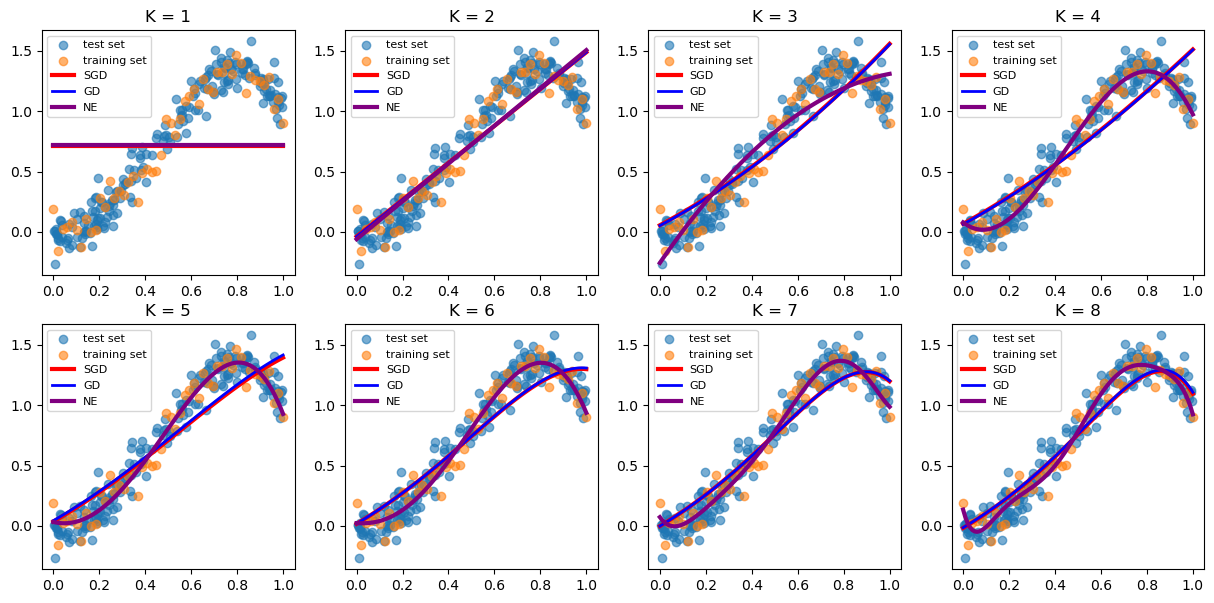

In [37]:
thetas_SGD = []
thetas_GD = []
thetas_NE = []

for K in range(1, 9):
    theta0 = np.zeros((K))
    theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
    thetas_SGD.append(theta_SGD[-1])
    theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
    thetas_GD.append(theta_GD[-1])
    theta_NE = NE(K, (X_small, Y_small))
    thetas_NE.append(theta_NE)

plt.figure(figsize=(15,7))
for K in range(1, 9):
    x = np.linspace(0,1, 100)
    plt.subplot(2,4,K)
    plt.scatter(X_test_large, Y_test_large, alpha=0.6, label="test set")
    plt.scatter(X_small, Y_small, alpha=0.6, label="training set")
    plt.plot(x, f(thetas_SGD[K-1], x), color="red", linewidth=3, label="SGD")
    plt.plot(x, f(thetas_GD[K-1], x), color="blue", linewidth=2, label="GD")
    plt.plot(x, f(thetas_NE[K-1], x), color="purple", linewidth=3, label="NE")
    plt.title(f"K = {K}")
    plt.legend(prop={'size': 8})
plt.show()

thetas_SGD_MLE = thetas_SGD
thetas_GD_MLE = thetas_GD
thetas_NE_MLE = thetas_NE

> By increasing $K$ the error lowers, but for the NE method, with high $K$ we can notice the overfitting

### Error

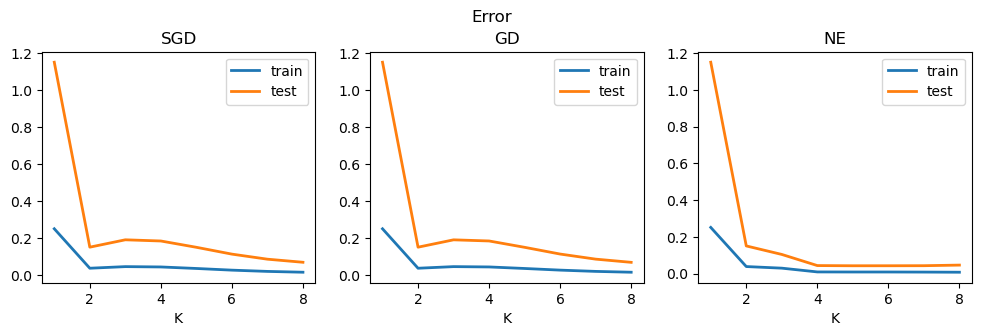

In [38]:
errs_SGD = []
errs_GD = []
errs_NE = []
errs_SGD_test = []
errs_GD_test = []
errs_NE_test = []

for K in range(1, 9):
    err_SGD = np.sum(np.square((np.vander(X_small, K, True)@thetas_SGD[K-1])-(Y_small.T))) / N
    err_GD = np.sum(np.square((np.vander(X_small, K, True)@thetas_GD[K-1])-(Y_small.T))) / N
    err_NE = np.sum(np.square((np.vander(X_small, K, True)@thetas_NE[K-1])-(Y_small.T))) / N
    errs_SGD.append(err_SGD)
    errs_GD.append(err_GD)
    errs_NE.append(err_NE)
    err_SGD = np.sum(np.square((np.vander(X_test_large, K, True)@thetas_SGD[K-1])-(Y_test_large.T))) / N
    err_GD = np.sum(np.square((np.vander(X_test_large, K, True)@thetas_GD[K-1])-(Y_test_large.T))) / N
    err_NE = np.sum(np.square((np.vander(X_test_large, K, True)@thetas_NE[K-1])-(Y_test_large.T))) / N
    errs_SGD_test.append(err_SGD)
    errs_GD_test.append(err_GD)
    errs_NE_test.append(err_NE)

x = list(range(1, 9))
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
plt.plot(x, errs_SGD, linewidth=2, label="train")
plt.plot(x, errs_SGD_test, linewidth=2, label="test")
plt.title("SGD")
plt.legend()
plt.xlabel("K")
plt.subplot(1,3,2)
plt.plot(x, errs_GD, linewidth=2,label="train")
plt.plot(x, errs_GD_test, linewidth=2,label="test")
plt.title("GD")
plt.legend()
plt.xlabel("K")
plt.subplot(1,3,3)
plt.plot(x, errs_NE, linewidth=2,label="train")
plt.plot(x, errs_NE_test, linewidth=2,label="test")
plt.title("NE")
plt.legend()
plt.xlabel("K")
plt.suptitle("Error", y=1.02)
plt.show()

# MAP

In [39]:
K = 8 # polynomial degree
N = X_small.shape[0] # number of points
batch_size = 5
n_epochs = 100
theta0 = np.zeros((K))
alpha = 0.01
l = 0.005 # lambda

# MAP
def f(theta, x):
    return (np.vander(x, K, True)@theta)

def loss(theta, x, y):
    return ((1/2) * np.linalg.norm((np.vander(X_small, K, True)@theta)-(Y_small.T),2)**2) + ((l/2) * np.linalg.norm(theta, 2)**2)

def grad_loss(theta, x, y):
    X_vander = np.vander(x, K, True)
    error = X_vander @ theta - y.T
    return (X_vander.T @ error) + l*theta

### Compute the MAP

In [40]:
theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
theta_SGD = theta_SGD[-1]
theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
theta_GD = theta_GD[-1]
theta_NE = NE_MAP(K, (X_small, Y_small))

### Compute the prediction error

In [41]:
err_SGD_MAP = np.sum(np.square((np.vander(X_small, K, True)@theta_SGD)-(Y_small.T))) / N
err_GD_MAP = np.sum(np.square((np.vander(X_small, K, True)@theta_GD)-(Y_small.T))) / N
err_NE_MAP = np.sum(np.square((np.vander(X_small, K, True)@theta_NE)-(Y_small.T))) / N

print(f"Error with SGD:\t {err_SGD_MAP}")
print(f"Error with GD:\t {err_GD_MAP}")
print(f"Error with NE:\t {err_NE_MAP}")

Error with SGD:	 0.0182298679401328
Error with GD:	 0.017639011471240855
Error with NE:	 0.00990072417380929


## Plots

### Regression model

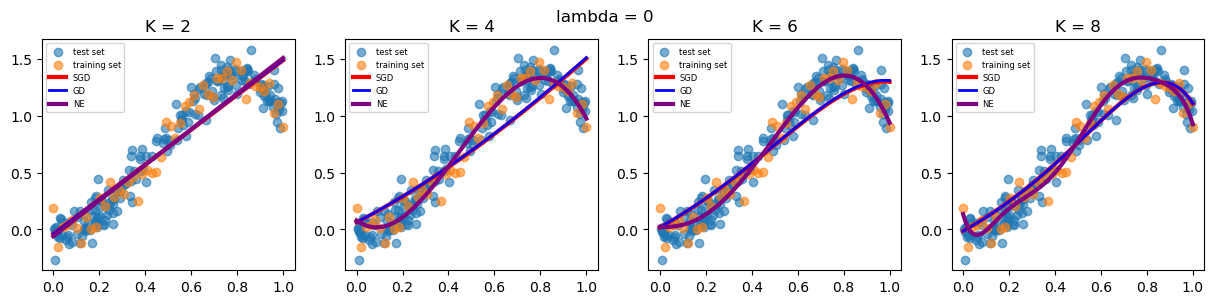

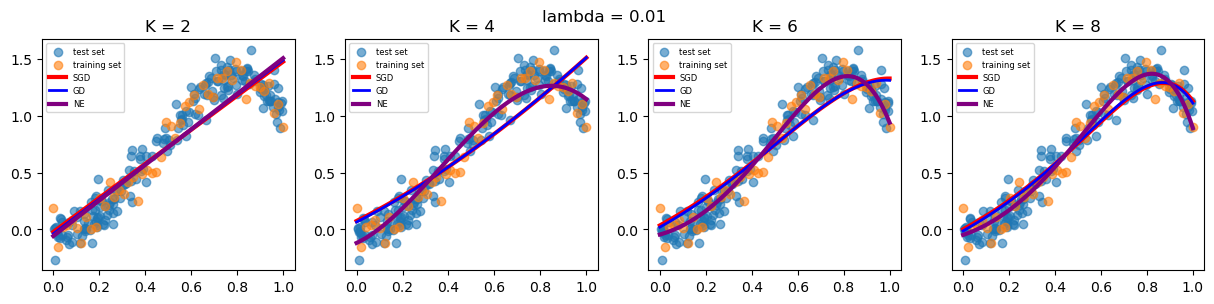

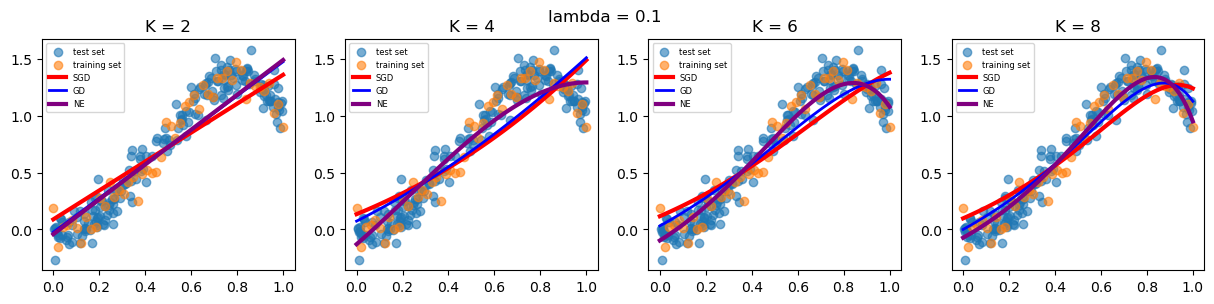

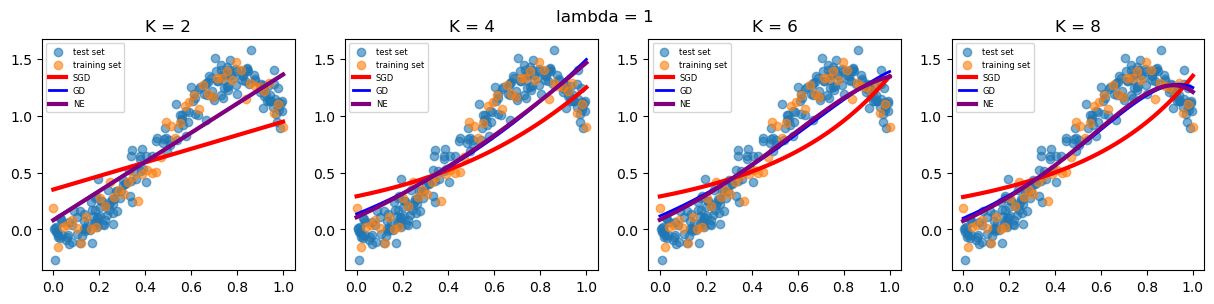

In [42]:
Ks = list(range(2,9,2))
ls = [0, 0.01, 0.1, 1]
thetas_SGD_lambdas = []
thetas_GD_lambdas = []
thetas_NE_lambdas = []

for l in ls:
    thetas_SGD = []
    thetas_GD = []
    thetas_NE = []
    for K in Ks:
        theta0 = np.zeros((K))
        theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
        thetas_SGD.append(theta_SGD[-1])
        theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
        thetas_GD.append(theta_GD[-1])
        theta_NE = NE_MAP(K, (X_small, Y_small))
        thetas_NE.append(theta_NE)

    plt.figure(figsize=(15,3))
    plt.suptitle(f"lambda = {l}")
    i = 0
    for K in Ks:
        x = np.linspace(0,1, 100)
        plt.subplot(1,4,i+1)
        plt.scatter(X_test_large, Y_test_large, alpha=0.6, label="test set")
        plt.scatter(X_small, Y_small, alpha=0.6, label="training set")
        plt.plot(x, f(thetas_SGD[i], x), color="red", linewidth=3, label="SGD")
        plt.plot(x, f(thetas_GD[i], x), color="blue", linewidth=2, label="GD")
        plt.plot(x, f(thetas_NE[i], x), color="purple", linewidth=3, label="NE")
        plt.title(f"K = {K}")
        plt.legend(prop={'size': 6})
        i += 1
    plt.show()

    thetas_SGD_lambdas.append(thetas_SGD)
    thetas_GD_lambdas.append(thetas_GD)
    thetas_NE_lambdas.append(thetas_NE)
    thetas_SGD = []
    thetas_GD = []
    thetas_NE = []

> The $\lambda$ parameter makes a good job preventing overfitting, especially when it is in the order of $10^{-2}$. 
> For eccessivly large $\lambda$ the regression does not fit the data well, as it straightens

### Errors

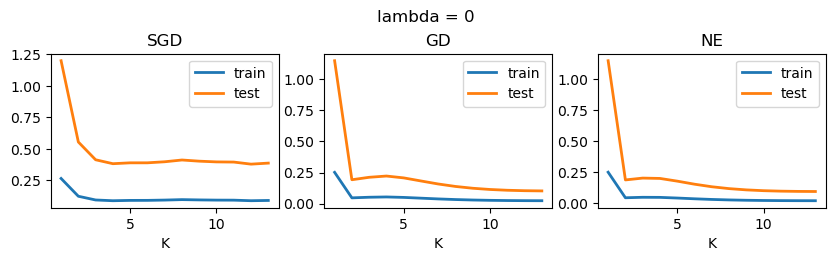

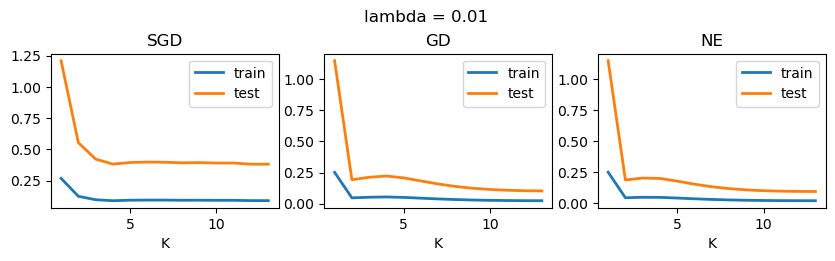

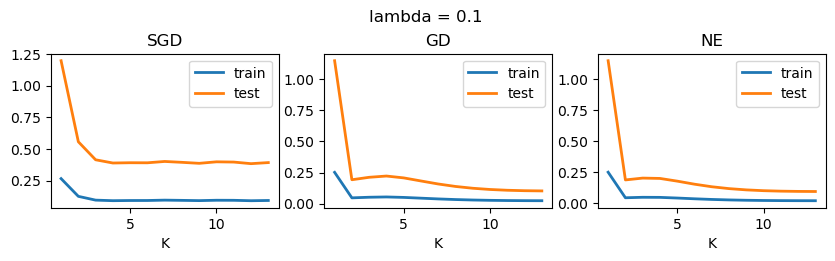

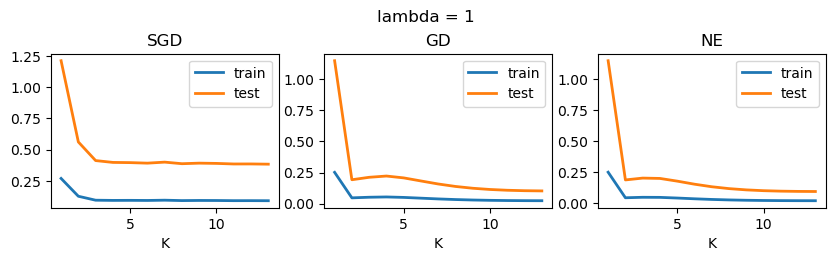

In [44]:
Ks = list(range(1,14))
ls = [0, 0.01, 0.1, 1]

for i in range(len(ls)):
    errs_SGD, errs_GD, errs_NE = [], [], []
    errs_SGD_test, errs_GD_test, errs_NE_test = [], [], []

    for j in range(len(Ks)):
        K = Ks[j]
        theta0 = np.zeros((K))

        theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
        theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
        theta_NE = NE_MAP(K, (X_small, Y_small))

        # Train error
        err_SGD = np.sum(np.square((np.vander(X_small, K, True)@theta_SGD[-1])-(Y_small.T))) / N
        err_GD = np.sum(np.square((np.vander(X_small, K, True)@theta_GD[-1])-(Y_small.T))) / N
        err_NE = np.sum(np.square((np.vander(X_small, K, True)@theta_NE)-(Y_small.T))) / N
        errs_SGD.append(err_SGD)
        errs_GD.append(err_GD)
        errs_NE.append(err_NE)
        # Test error
        err_SGD = np.sum(np.square((np.vander(X_test_large, K, True)@theta_SGD[-1])-(Y_test_large.T))) / N
        err_GD = np.sum(np.square((np.vander(X_test_large, K, True)@theta_GD[-1])-(Y_test_large.T))) / N
        err_NE = np.sum(np.square((np.vander(X_test_large, K, True)@theta_NE)-(Y_test_large.T))) / N
        errs_SGD_test.append(err_SGD)
        errs_GD_test.append(err_GD)
        errs_NE_test.append(err_NE)
        
    x = Ks
    plt.figure(figsize=(10, 2))
    plt.suptitle(f"lambda = {ls[i]}", y=1.1)
    plt.subplot(1,3,1)
    plt.plot(x, errs_SGD, linewidth=2, label="train")
    plt.plot(x, errs_SGD_test, linewidth=2, label="test")
    plt.title("SGD")
    plt.xlabel("K")
    plt.legend()
    plt.subplot(1,3,2)
    plt.plot(x, errs_GD, linewidth=2,label="train")
    plt.plot(x, errs_GD_test, linewidth=2,label="test")
    plt.title("GD")
    plt.xlabel("K")
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(x, errs_NE, linewidth=2,label="train")
    plt.plot(x, errs_NE_test, linewidth=2,label="test")
    plt.legend()
    plt.title("NE")
    plt.xlabel("K")
    plt.show()

# Comparison

#### Error

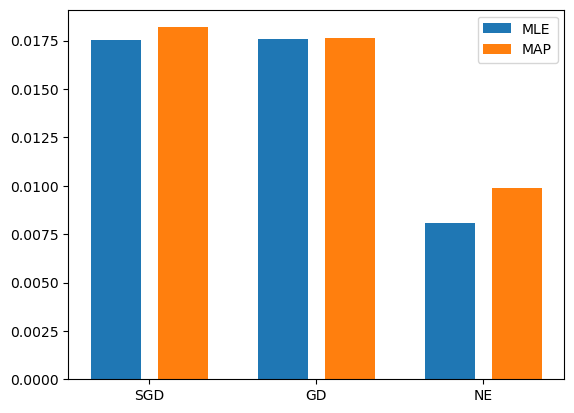

In [19]:
MLE_ERRS = [err_SGD_MLE, err_GD_MLE, err_NE_MLE]
MAP_ERRS = [err_SGD_MAP, err_GD_MAP, err_NE_MAP]

x =  np.array([1,2,3])
plt.bar(x-0.2, MLE_ERRS, width=0.3, label="MLE")
plt.bar(x+0.2, MAP_ERRS, width=0.3, label="MAP")
plt.legend()
plt.xticks(x, ["SGD","GD","NE"])
plt.title("")
plt.show()

> The minimization of MAP gives better results than MLE, in particular for the Normal Equations methos, which is prone to overfitting